In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [93]:
# Load & Split Data

mnist = tf.keras.datasets.mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)

xtrain shape: (60000, 28, 28)
xtest shape: (10000, 28, 28)


In [94]:
# Build Model

model = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(224, activation="relu"),
  Dropout(0.2),
  Dense(28, activation="softmax")                                    
])

In [95]:
# Compile Model

model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [96]:
# Train Model

r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7073 - accuracy: 0.8125 - val_loss: 0.3555 - val_accuracy: 0.9027
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3738 - accuracy: 0.8918 - val_loss: 0.2907 - val_accuracy: 0.9192
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.9097 - val_loss: 0.2581 - val_accuracy: 0.9287
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.9202 - val_loss: 0.2301 - val_accuracy: 0.9367
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2536 - accuracy: 0.9280 - val_loss: 0.2113 - val_accuracy: 0.9416
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2317 - accuracy: 0.9353 - val_loss: 0.1963 - val_accuracy: 0.9451
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2149 - accuracy: 0.9393 - val_loss: 0.1818 - val_accuracy:

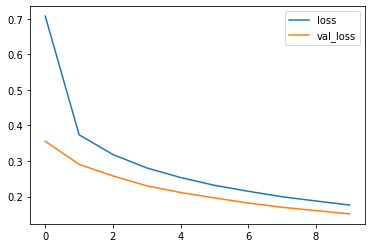

In [97]:
# Plot Loss

import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

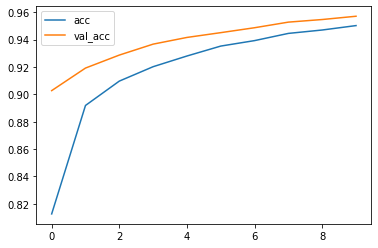

In [98]:
# Plot Accuracy

plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [99]:
# Evaluate

print(model.evaluate(xtest, ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.1511 - accuracy: 0.9571
[0.15111714601516724, 0.957099974155426]
